Problem Statement


You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

Features: 


age (numeric)
job : type of job
marital : marital status
educational_qual : education status
call_type : contact communication type
day: last contact day of the month (numeric)
mon: last contact month of year
dur: last contact duration, in seconds (numeric)
num_calls: number of contacts performed during this campaign and for this client 
prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):


y - has the client subscribed to the insurance


Importing Libraries and Data

In [1]:
#Importing Libraries

import pandas as pd

import numpy as np                     

import seaborn as sns                

import matplotlib.pyplot as plt
%matplotlib inline


# For ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing data
data = pd.read_csv(r"D:\IITM_Final_Project\Customer Conversion Prediction - Customer Conversion Prediction.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [3]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [5]:
data.shape

(45211, 11)

In [6]:
data.dtypes
#ojbect are categorical datatypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

no     39922
yes     5289
Name: y, dtype: int64

Not Subscribed -  88.3 % of the dataset
Subscribed -  11.7 % of the dataset


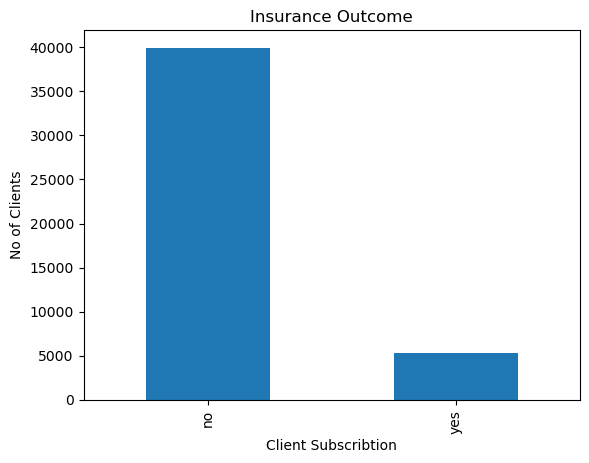

In [7]:
#Target variable analysis
print(data['y'].value_counts())

print('\nNot Subscribed - ', round(data['y'].value_counts()['no']/len(data)*100, 2), '% of the dataset')
print('Subscribed - ', round(data['y'].value_counts()['yes']/len(data)*100, 2), '% of the dataset')

#Plotting distributiion
data['y'].value_counts().plot(kind='bar')
plt.title('Insurance Outcome')
plt.xlabel('Client Subscribtion')
plt.ylabel('No of Clients')
plt.show()

Data Cleaning

In [8]:
# checking for null values
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

No null values in the data, but we can see there are 'unknown' category which we consider as null values.

In [9]:
data[data=='unknown'].count()

age                   0
job                 288
marital               0
education_qual     1857
call_type         13020
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36959
y                     0
dtype: int64

In [10]:
# Dropping the duplicate values
data.drop_duplicates(inplace=True)

Job Column

In [11]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [12]:
# Count of unknown values
job_uc = data['job'][data['job']=='unknown'].count()
print("unknown job",job_uc)
#percentage of unknown values
job_ucp = (job_uc/len(data['job']))*100
print(f'{round(job_ucp, 2)}% of job column is unknown')

unknown job 288
0.64% of job column is unknown


In [13]:
#Imputing Job Column
# Imputing job column
data['job'].replace('unknown', data['job'].mode()[0], inplace=True)
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

Martial Column

In [14]:
data.marital.unique()
# no unknown values

array(['married', 'single', 'divorced'], dtype=object)

education_qual column

In [15]:
data.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [16]:
eq_uc = data['education_qual'][data['education_qual']=='unknown'].count()
print("unknown education_qual",eq_uc)
eq_ucp = eq_uc/len(data['education_qual'])*100
print(f'{round(eq_ucp, 2)}% of education_qual column is unknown')
# Imputing education_qual Column
data['education_qual'].replace('unknown', data['education_qual'].mode()[0], inplace=True)

unknown education_qual 1857
4.11% of education_qual column is unknown


Exploratory Data Analysis

In [17]:
num_col=list(data._get_numeric_data())
cat_col=list(data.select_dtypes(include = ['object']))
print("Numerical columns are",num_col)
print("Categorical columns are",cat_col)

Numerical columns are ['age', 'day', 'dur', 'num_calls']
Categorical columns are ['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']


<Figure size 640x480 with 0 Axes>

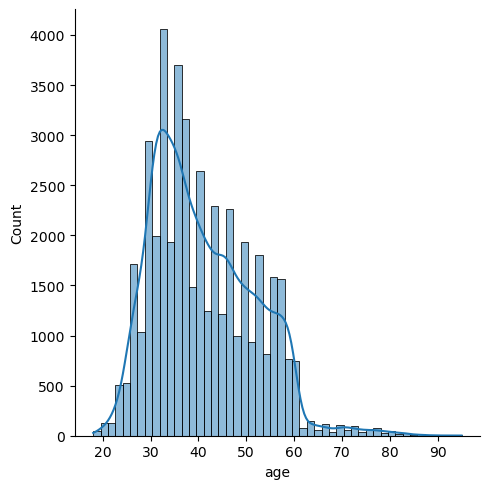

<Figure size 640x480 with 0 Axes>

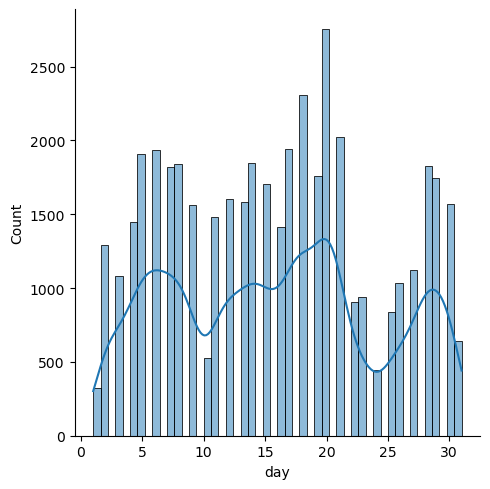

<Figure size 640x480 with 0 Axes>

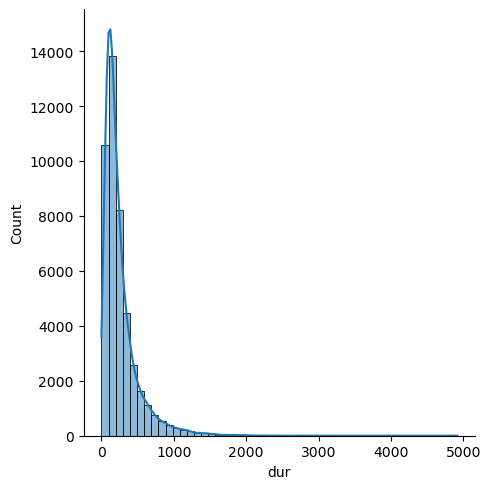

<Figure size 640x480 with 0 Axes>

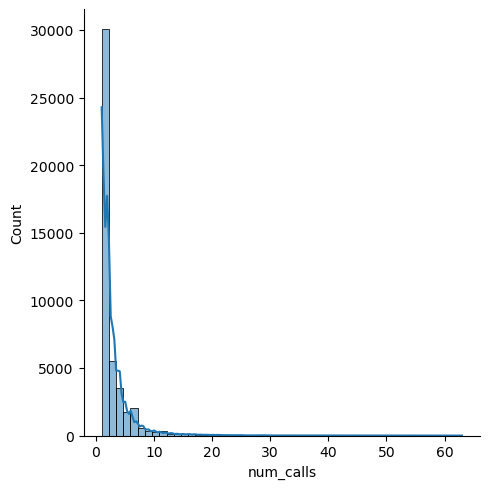

In [18]:
for i in num_col:
    plt.figure()
    sns.displot(data=data[i],kde=True,bins=50)

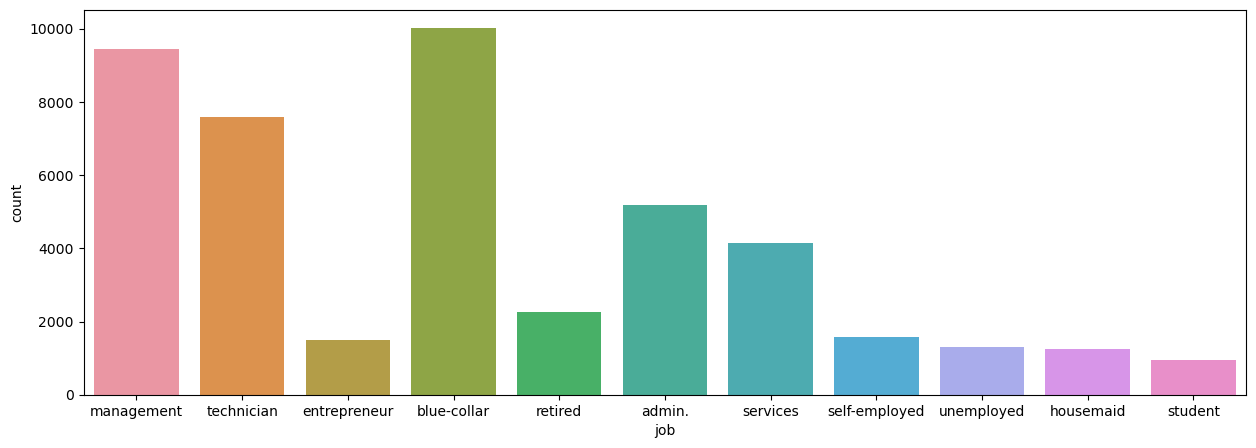

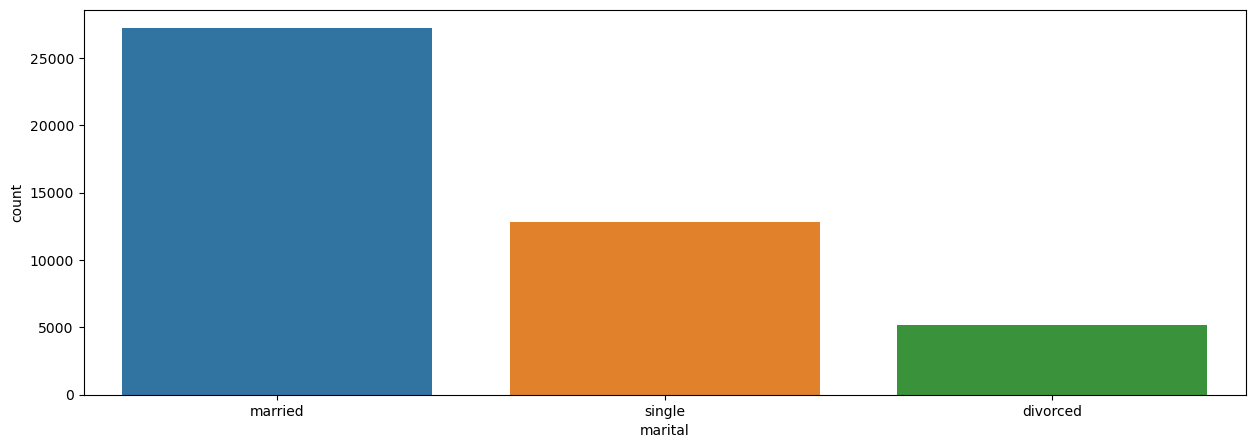

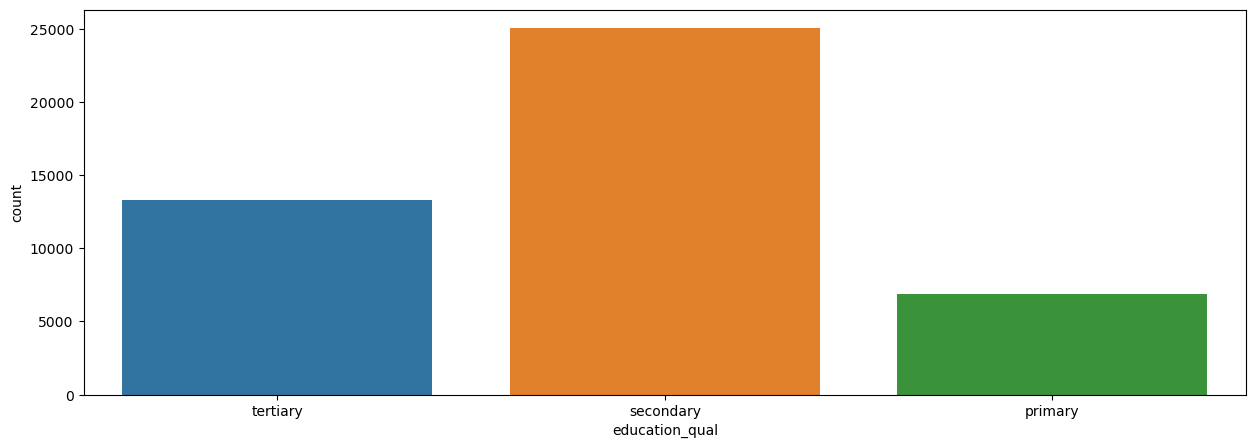

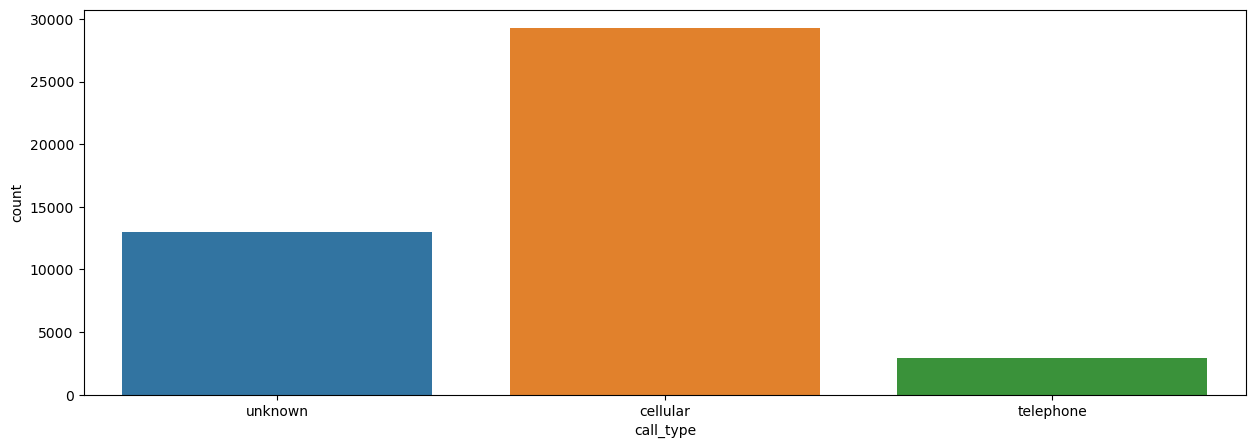

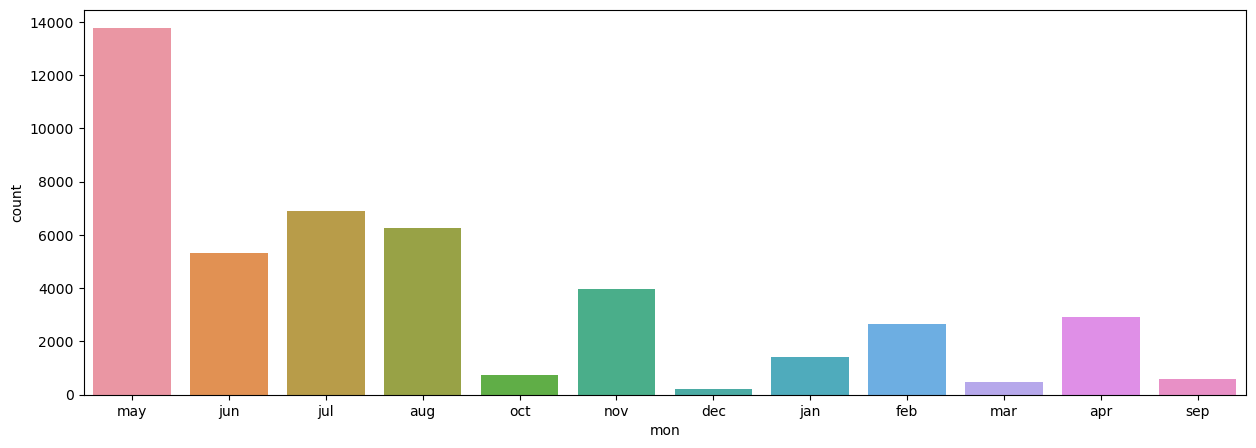

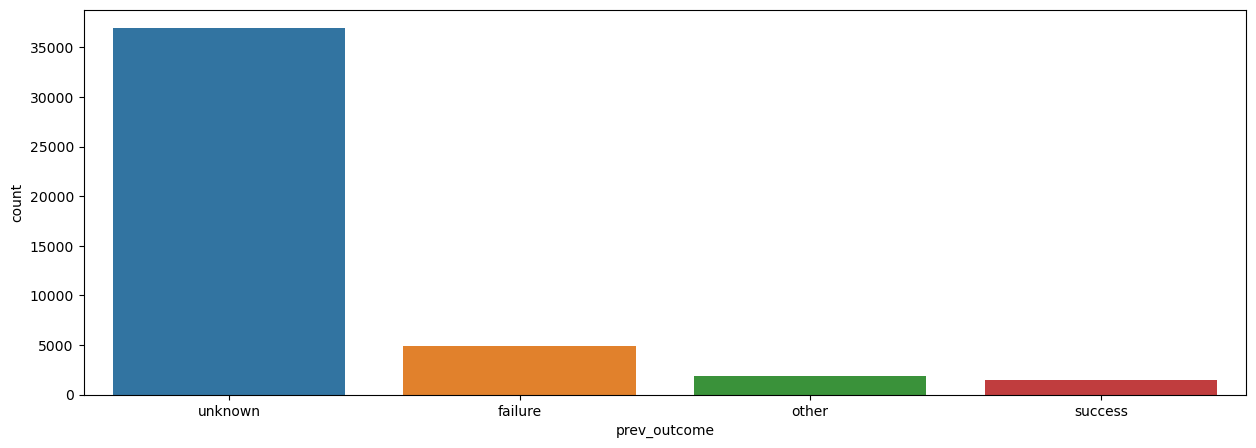

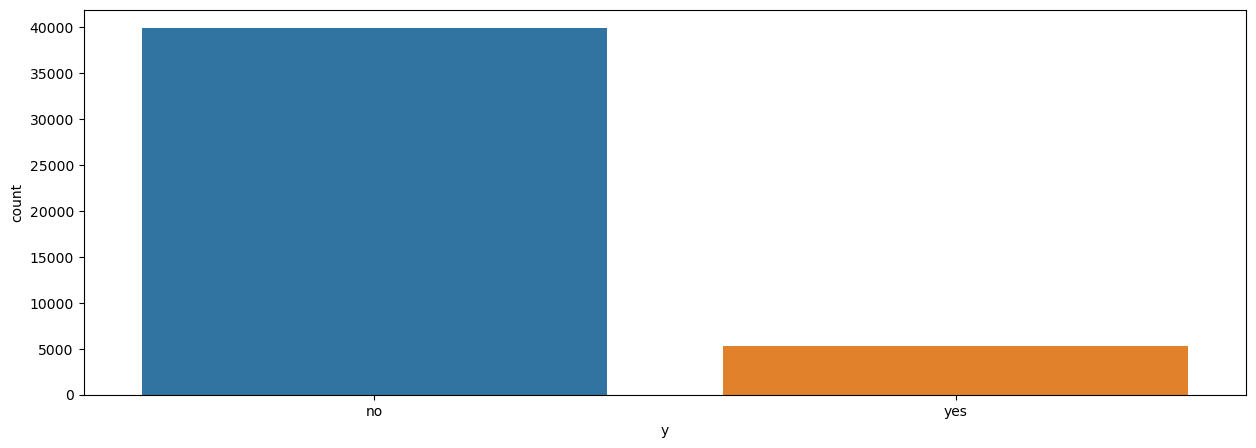

In [19]:
for i in cat_col:
    plt.figure(figsize=(15,5)),
    sns.countplot(x=data[i],data=data)
    

Encoding

In [20]:
#Target column encoding
data['y'] = data['y'].map({'yes':1, 'no':0})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,0


In [21]:
#Job column encoding
job_cat_ord = {'blue-collar':1, 'entrepreneur':2, 'housemaid':3, 'services':4, 'technician': 5, 'self-employed':6,
              'admin.':7, 'management':8, 'unemployed':9, 'retired':10, 'student':11}
data['job'] = data['job'].map(job_cat_ord)
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,5,single,secondary,unknown,5,may,151,1,unknown,0
2,33,2,married,secondary,unknown,5,may,76,1,unknown,0
3,47,1,married,secondary,unknown,5,may,92,1,unknown,0
4,33,1,single,secondary,unknown,5,may,198,1,unknown,0


In [22]:
#Marital column encoding
marital_cat_ord = {'married':1, 'divorced':2, 'single':3}
data['marital'] = data['marital'].map(marital_cat_ord)
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,1,tertiary,unknown,5,may,261,1,unknown,0
1,44,5,3,secondary,unknown,5,may,151,1,unknown,0
2,33,2,1,secondary,unknown,5,may,76,1,unknown,0
3,47,1,1,secondary,unknown,5,may,92,1,unknown,0
4,33,1,3,secondary,unknown,5,may,198,1,unknown,0


In [23]:
#education_qual column encoding
education_qual_cat_ord = {'primary':1, 'secondary':2, 'tertiary':3}
data['education_qual'] = data['education_qual'].map(education_qual_cat_ord)
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,1,3,unknown,5,may,261,1,unknown,0
1,44,5,3,2,unknown,5,may,151,1,unknown,0
2,33,2,1,2,unknown,5,may,76,1,unknown,0
3,47,1,1,2,unknown,5,may,92,1,unknown,0
4,33,1,3,2,unknown,5,may,198,1,unknown,0


In [24]:
#call_type encoding
call_type_cat_ord = {'unknown':1, 'telephone':2, 'cellular':3}
data['call_type'] = data['call_type'].map(call_type_cat_ord)
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,1,3,1,5,may,261,1,unknown,0
1,44,5,3,2,1,5,may,151,1,unknown,0
2,33,2,1,2,1,5,may,76,1,unknown,0
3,47,1,1,2,1,5,may,92,1,unknown,0
4,33,1,3,2,1,5,may,198,1,unknown,0


In [25]:
#month column encoding
mon_cat_ord = {'may':1, 'jul':2, 'jan':3, 'nov':4, 'jun':5, 'aug':6, 'feb':7, 'apr':8, 'oct':9, 'sep':10, 'dec':11, 'mar':12}
data['mon'] = data['mon'].map(mon_cat_ord)
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,1,3,1,5,1,261,1,unknown,0
1,44,5,3,2,1,5,1,151,1,unknown,0
2,33,2,1,2,1,5,1,76,1,unknown,0
3,47,1,1,2,1,5,1,92,1,unknown,0
4,33,1,3,2,1,5,1,198,1,unknown,0


In [26]:
#prev_outcome encoding
prev_outcome_cat_ord = {'unknown':1, 'failure':2, 'other':3, 'success':4}
data['prev_outcome'] = data['prev_outcome'].map(prev_outcome_cat_ord)
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,1,3,1,5,1,261,1,1,0
1,44,5,3,2,1,5,1,151,1,1,0
2,33,2,1,2,1,5,1,76,1,1,0
3,47,1,1,2,1,5,1,92,1,1,0
4,33,1,3,2,1,5,1,198,1,1,0


Data Splitting

In [27]:
#feature selection
X = data.drop('y', axis=1).values
y = data['y']


In [28]:
#data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25)

In [29]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Linear Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [31]:
print("Confusion Matrix of LogisticRegression Model\n",confusion_matrix(y_test, lr.predict(X_test)))

Confusion Matrix of LogisticRegression Model
 [[9767  213]
 [ 942  380]]


In [32]:
print("ROC AUC Score of LogisticRegression Model ",roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

ROC AUC Score of LogisticRegression Model  0.8950860874547886


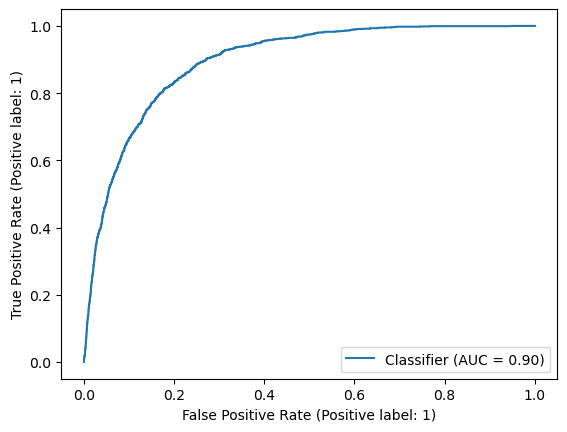

In [33]:
RocCurveDisplay.from_predictions(y_test, lr.predict_proba(X_test)[:, 1])

In [34]:
print("Classification of LogisticRegression Model \n\n",classification_report(lr.predict(X_test), y_test))

Classification of LogisticRegression Model 

               precision    recall  f1-score   support

           0       0.98      0.91      0.94     10709
           1       0.29      0.64      0.40       593

    accuracy                           0.90     11302
   macro avg       0.63      0.78      0.67     11302
weighted avg       0.94      0.90      0.92     11302



K - Nearest Neighbors

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
k_range = range(1, 21)
train_scores = []
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1])
    val_score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc'))
    k_score = val_score
    print(f'K = {k}----Train Score = {train_score}----CV Score = {k_score}')

K = 1----Train Score = 1.0----CV Score = 0.6805474698080379
K = 2----Train Score = 0.9816713012632141----CV Score = 0.7545456587133581
K = 3----Train Score = 0.971532614675024----CV Score = 0.7900891782259667
K = 4----Train Score = 0.964362975271538----CV Score = 0.815826845106219
K = 5----Train Score = 0.9586269041883082----CV Score = 0.8325778494299222
K = 6----Train Score = 0.9544433047791259----CV Score = 0.8420307730347399
K = 7----Train Score = 0.9510942013662421----CV Score = 0.85091097292099
K = 8----Train Score = 0.9478977764108679----CV Score = 0.8572594231479057
K = 9----Train Score = 0.945291476871523----CV Score = 0.8620455527407822
K = 10----Train Score = 0.9430503416952553----CV Score = 0.8665503612644295
K = 11----Train Score = 0.941185843975761----CV Score = 0.8698982224445725
K = 12----Train Score = 0.9396773279340771----CV Score = 0.8728845882149102
K = 13----Train Score = 0.9379849434612679----CV Score = 0.8749887732279019
K = 14----Train Score = 0.93666638816872---

In [36]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [37]:
print("Confusion Matrix of KNeighborsClassifier\n",confusion_matrix(y_test, knn.predict(X_test)))

Confusion Matrix of KNeighborsClassifier
 [[9708  272]
 [ 856  466]]


In [38]:
print("ROC AUC Score of KNeighborsClassifier",roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

ROC AUC Score of KNeighborsClassifier 0.8744125922040753


In [39]:
print("Classification of KNeighborsClassifier\n\n",classification_report(y_test, knn.predict(X_test)))

Classification of KNeighborsClassifier

               precision    recall  f1-score   support

           0       0.92      0.97      0.95      9980
           1       0.63      0.35      0.45      1322

    accuracy                           0.90     11302
   macro avg       0.78      0.66      0.70     11302
weighted avg       0.89      0.90      0.89     11302



DecisionTree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
for depth in [5,6,7,8,9,10,11,12,13,14,15,20,30,40]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    train_score = roc_auc_score(y_train, dt.predict(X_train))
    dt = DecisionTreeClassifier(max_depth=depth)
    val_score = np.mean(cross_val_score(dt, X_train, y_train, cv=10, scoring='roc_auc'))
    print("Depth  : ", depth, " Training Accuracy : ", train_score, " Cross val score : " ,val_score)

Depth  :  5  Training Accuracy :  0.6784115498830073  Cross val score :  0.8605213774098273
Depth  :  6  Training Accuracy :  0.713595204261992  Cross val score :  0.8770401773186407
Depth  :  7  Training Accuracy :  0.7206457087446582  Cross val score :  0.879032460888698
Depth  :  8  Training Accuracy :  0.7340240306957843  Cross val score :  0.8749398741296824
Depth  :  9  Training Accuracy :  0.7624361893895616  Cross val score :  0.8617467247876182
Depth  :  10  Training Accuracy :  0.7707150853844053  Cross val score :  0.8472624865897048
Depth  :  11  Training Accuracy :  0.7925365306671541  Cross val score :  0.8207173280681864
Depth  :  12  Training Accuracy :  0.8140482108407187  Cross val score :  0.7960270178218488
Depth  :  13  Training Accuracy :  0.831992735666523  Cross val score :  0.7692698980034427
Depth  :  14  Training Accuracy :  0.852242472370601  Cross val score :  0.7535395297627792
Depth  :  15  Training Accuracy :  0.8816992972959573  Cross val score :  0.747

In [41]:
dt = DecisionTreeClassifier(max_depth=11)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11)

In [42]:
print("Confusion Matrix of DecisionTreeClassifier\n",confusion_matrix(y_test, dt.predict(X_test)))

Confusion Matrix of DecisionTreeClassifier
 [[9519  461]
 [ 690  632]]


In [43]:
print("ROC AUC Score of DecisionTreeClassifier",roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

ROC AUC Score of DecisionTreeClassifier 0.837099046807685


In [44]:
print("Classification of DecisionTreeClassifier\n\n",classification_report(y_test, dt.predict(X_test)))

Classification of DecisionTreeClassifier

               precision    recall  f1-score   support

           0       0.93      0.95      0.94      9980
           1       0.58      0.48      0.52      1322

    accuracy                           0.90     11302
   macro avg       0.76      0.72      0.73     11302
weighted avg       0.89      0.90      0.89     11302

